<a href="https://colab.research.google.com/github/Shrivastav-Gaurav/GenAI-ML-Notebook/blob/main/ngram_language_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N-Gram Language Model (Trigram Example)

This notebook builds a basic N-Gram language model from scratch, trains it on a toy corpus, and generates new text based on a seed. It also includes a visualization of the n-gram frequency distribution.

In [1]:
import random
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
class NGramLanguageModel:
    def __init__(self, n):
        self.n = n
        self.ngrams = defaultdict(int)
        self.start_tokens = ['<start>'] * (n - 1)

    def train(self, corpus):
        for sentence in corpus:
            tokens = self.start_tokens + sentence.split() + ['<end>']
            for i in range(len(tokens) - self.n + 1):
                ngram = tuple(tokens[i:i + self.n])
                self.ngrams[ngram] += 1

    def generate_text(self, seed_text, length=10):
        seed_tokens = seed_text.split()
        padded_seed = self.start_tokens[-(self.n - 1 - len(seed_tokens)):] + seed_tokens
        generated_text = list(padded_seed)
        current_ngram = tuple(generated_text[-self.n + 1:])

        for _ in range(length):
            next_words = [ngram[-1] for ngram in self.ngrams if ngram[:-1] == current_ngram]
            if next_words:
                next_word = random.choice(next_words)
                generated_text.append(next_word)
                current_ngram = tuple(generated_text[-self.n + 1:])
            else:
                break

        return ' '.join(generated_text[len(self.start_tokens):])

    def plot_top_ngrams(self, top_k=10):
        counter = Counter(self.ngrams)
        top_ngrams = counter.most_common(top_k)
        labels = [' '.join(ng) for ng, _ in top_ngrams]
        counts = [count for _, count in top_ngrams]

        plt.figure(figsize=(10, 6))
        sns.barplot(x=counts, y=labels, palette='mako')
        plt.title(f'Top {top_k} {self.n}-grams')
        plt.xlabel('Frequency')
        plt.ylabel(f'{self.n}-gram')
        plt.show()

In [3]:
# Sample toy corpus
toy_corpus = [
    "This is a simple example.",
    "The example demonstrates an n-gram language model.",
    "N-grams are used in natural language processing.",
    "This is a toy corpus for language modeling."
]

In [4]:
# Initialize and train the model
n = 3
model = NGramLanguageModel(n)
model.train(toy_corpus)

In [5]:
# Generate text
seed_text = "This"
generated_text = model.generate_text(seed_text, length=10)
print("Seed text:", seed_text)
print("Generated text:", generated_text)

Seed text: This
Generated text: is a toy corpus for language modeling. <end>


/tmp/ipython-input-2-3401028507.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='mako')


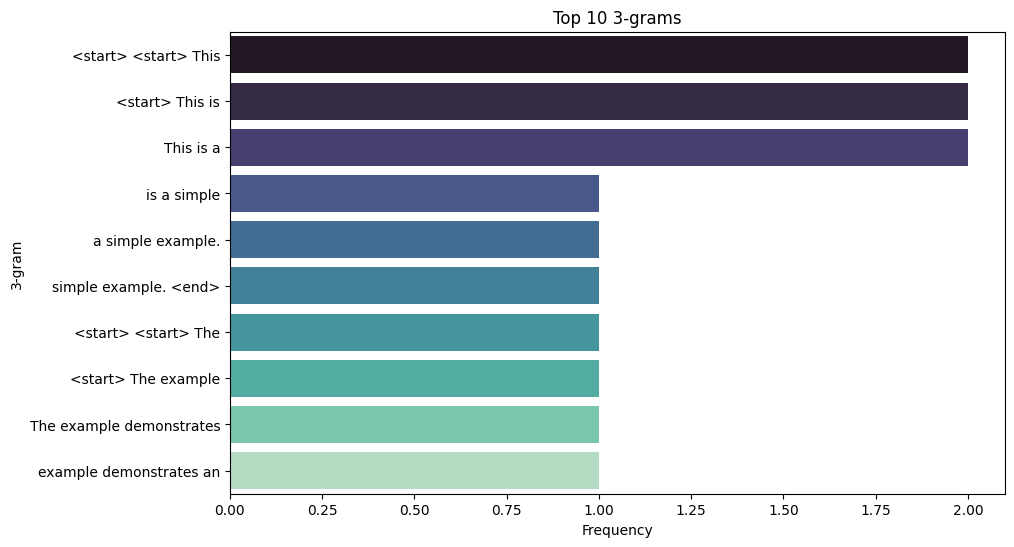

In [6]:
# Visualize top n-grams
model.plot_top_ngrams(top_k=10)